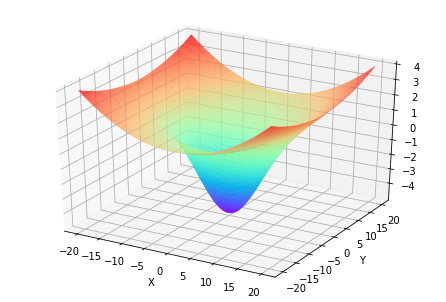

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sympy.vector import CoordSys3D
# shut down all warnings
import warnings
warnings.filterwarnings("ignore")

x = y = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(x, y)

Z = -5 * np.exp(-X * X / 80 - Y * Y / 20) + 0.007 * X * X + 0.003 * Y * Y

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('X')
plt.ylabel('Y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()


In [60]:
import math 

def f(x, y): ###define the function f
    return (-5 * math.exp(-x * x / 80 - y * y / 20) + 0.007 * x * x + 0.003 * y * y)

def num_grad_f (x,y,step_size = 1e-3): ### numerical compute the gradient of f
    grad_x = (f(x + step_size/2,y) - f(x - step_size/2,y) ) /step_size
    grad_y = (f(x,y+ step_size/2) - f(x ,y- step_size/2) ) /step_size
    return grad_x,grad_y

def search_para (x0, y0, x,y, 
                 eta_min = -1 , eta_max = 1 , 
                 theta_min = -1, theta_max = 1, 
                 n = 100 , step_size = 1e-3):
    
    eta_delta = (eta_max - eta_min)/n
    theta_delta = (theta_max - theta_min)/n
    
    eta = eta_min ; theta = theta_min
    
    eta_best = eta ; theta_best = theta
    
    grad_x , grad_y = num_grad_f (x,y,step_size)
    
    x1 = x - eta * grad_x + theta * (x - x0)
    y1 = y - eta * grad_y + theta * (y - y0)
    
    
    for i in range(n):
        for j in range(n):
            x_tmp = x - eta * grad_x + theta * (x - x0)
            y_tmp = y - eta * grad_y + theta * (y - y0)
            if (f(x_tmp,y_tmp) < f(x1,y1)):
                x1 = x_tmp
                y1 = y_tmp
                eta_best = eta ; theta_best = theta
                
            theta += theta_delta
        eta += eta_delta
        theta = theta_min
    return x1 , y1, eta_best, theta_best
    

def heavy_ball(x0 , y0, eta_min = -1 , eta_max = 1 , theta_min = -1, theta_max = 1, step_size = 1e-3 , n = 100, ite = 100):
    hist_x = []
    hist_y = []
    hist_f = []
    hist_eta = []
    hist_theta = []
    loss = []
    delta_x , delta_y = num_grad_f (x0,y0,step_size)
    x1 = x0 - delta_x ; y1 = y0 - delta_y
    #hist_x.append(x1) ; hist_y.append(y1)
    for i in range(ite):
        x2, y2, eta, theta = search_para(x0,y0,x1,y1,
                                         eta_min= eta_min, eta_max= eta_max,
                                         theta_max= theta_max , theta_min= theta_min,
                                         n=n,step_size=step_size)
        hist_f.append(f(x2,y2))
        hist_eta.append(eta) ; hist_theta.append(theta) ; 
        hist_x.append(x2); hist_y.append(y2);
        loss.append(f(x2,y2) - f(0,0))
        x0 , x1 = x1 , x2 
        y0 , y1 = y1 , y2
    return hist_x,hist_y,hist_f,hist_eta,hist_theta,loss
        
        
         
    


In [61]:
hist_x,hist_y,hist_f,hist_eta,hist_theta, loss = heavy_ball(10 , 15,-1,1,-1,1,n = 1000,ite= 50)


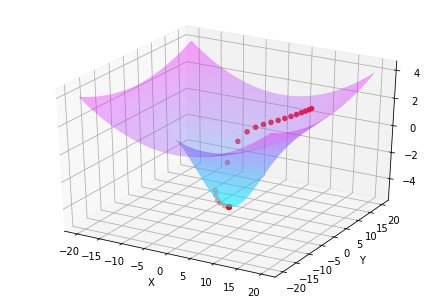

In [62]:


x = y = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(x, y)

Z = -5 * np.exp(-X * X / 80 - Y * Y / 20) + 0.007 * X * X + 0.003 * Y * Y

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('X')
plt.ylabel('Y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool',alpha = 0.4)
draw_step = 1
ax.scatter(hist_x[::draw_step],hist_y[::draw_step],hist_f[::draw_step],c = 'r', marker = 'o')
plt.show()

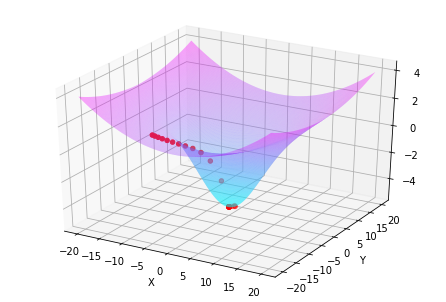

In [63]:
hist_x,hist_y,hist_f,hist_eta,hist_theta, loss = heavy_ball(-10 , -12 ,-1,1,-1,1,n = 1000,ite= 50)

x = y = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(x, y)

Z = -5 * np.exp(-X * X / 80 - Y * Y / 20) + 0.007 * X * X + 0.003 * Y * Y

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('X')
plt.ylabel('Y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool',alpha = 0.4)
draw_step = 1
ax.scatter(hist_x[::draw_step],hist_y[::draw_step],hist_f[::draw_step],c = 'r', marker = 'o')
plt.show()

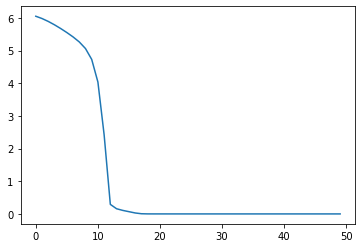

In [64]:
loss = hist_f  -  np.min(Z)
import matplotlib.pyplot as plt 
plt.plot(np.arange(len(loss)), loss)

In [65]:
import numpy as np
import scipy as sp

grad_x = []
grad_y = []
for ii in range(50):
    tmp_x, tmp_y = num_grad_f(hist_x[ii], hist_y[ii])
    grad_x.append(tmp_x)
    grad_y.append(tmp_y)
    

input_data = np.array([hist_x,hist_y,grad_x,grad_y])
out_data = np.array([hist_eta,hist_theta])
print(out_data.shape,'\n',input_data.shape)

(2, 50) 
 (4, 50)


In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(input_data.T,out_data.T)
#A = np.ones((2,4))
#predict = A.dot(input_data)
#res = np.sum(np.abs(predict - out_data))
#print(res)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
predict = model.predict(input_data.T)
res = np.sum(np.abs(predict - out_data.T))
print(res)

22.46728099706201


In [68]:
ite = 50 
x_0 = -10 ; y_0 = -12
hist_x = [] ; hist_y = [] ; hist_f = []

grad_x , grad_y = num_grad_f (x_0,y_0)
x = x_0 - grad_x ; y = y_0 - grad_y
grad_x , grad_y = num_grad_f (x,y)
init = np.array([x,y,grad_y,grad_x]).reshape((1,4))
result = model.predict(init)
#print(result.shape)
eta = result[0,0]
theta = result[0,1]
for i in range(ite):
    x_tmp = x - eta * grad_x + theta * (x - x_0)
    y_tmp = y - eta * grad_y + theta * (y - y_0)
    hist_x.append(x_tmp);hist_y.append(y_tmp) ; hist_f.append(f(x_tmp,y_tmp))
    x_0 = x ; y_0 = y
    x = x_tmp ; y = y_tmp
    grad_x , grad_y = num_grad_f (x,y)
    init = np.array([x,y,grad_y,grad_x]).reshape((1,4))
    result = model.predict(init)
    eta = result[0,0]; theta = result[0,1]
    

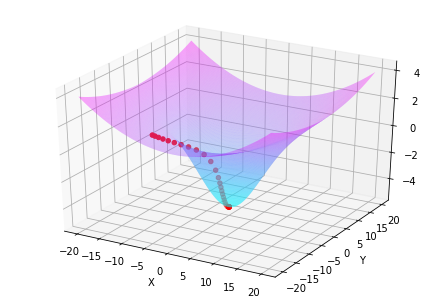

In [69]:
x = y = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(x, y)

Z = -5 * np.exp(-X * X / 80 - Y * Y / 20) + 0.007 * X * X + 0.003 * Y * Y

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('X')
plt.ylabel('Y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool',alpha = 0.4)
draw_step = 1
ax.scatter(hist_x[::draw_step],hist_y[::draw_step],hist_f[::draw_step],c = 'r', marker = 'o')
plt.show()

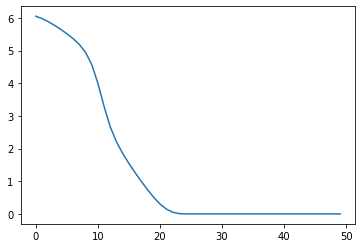

In [70]:
loss = hist_f  -  np.min(Z)
import matplotlib.pyplot as plt 
plt.plot(np.arange(len(loss)), loss)

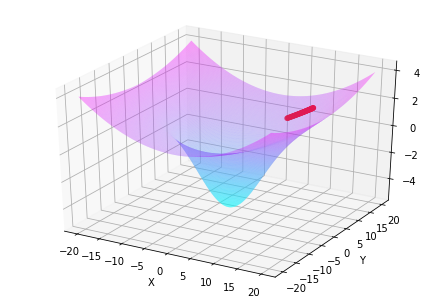

In [71]:
ite = 100 
x_0 = 10 ; y_0 = 15
hist_x = [] ; hist_y = [] ; hist_f = []

grad_x , grad_y = num_grad_f (x_0,y_0)
x = x_0 - grad_x ; y = y_0 - grad_y
grad_x , grad_y = num_grad_f (x,y)
init = np.array([x,y,grad_y,grad_x]).reshape((1,4))
result = model.predict(init)
#print(result.shape)
eta = result[0,0]
theta = result[0,1]
for i in range(ite):
    x_tmp = x - eta * grad_x + theta * (x - x_0)
    y_tmp = y - eta * grad_y + theta * (y - y_0)
    hist_x.append(x_tmp);hist_y.append(y_tmp) ; hist_f.append(f(x_tmp,y_tmp))
    x_0 = x ; y_0 = y
    x = x_tmp ; y = y_tmp
    grad_x , grad_y = num_grad_f (x,y)
    init = np.array([x,y,grad_y,grad_x]).reshape((1,4))
    result = model.predict(init)
    eta = result[0,0]; theta = result[0,1]
    
x = y = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(x, y)

Z = -5 * np.exp(-X * X / 80 - Y * Y / 20) + 0.007 * X * X + 0.003 * Y * Y

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('X')
plt.ylabel('Y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool',alpha = 0.4)
draw_step = 1
ax.scatter(hist_x[::draw_step],hist_y[::draw_step],hist_f[::draw_step],c = 'r', marker = 'o')
plt.show()

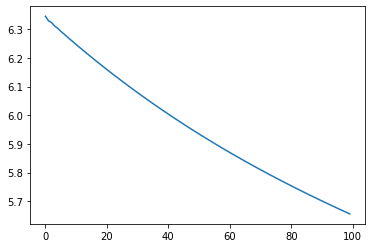

In [72]:
loss = hist_f  -  np.min(Z)
import matplotlib.pyplot as plt 
plt.plot(np.arange(len(loss)), loss)

In [73]:
def heavy_ball2(x0 , y0, eta_min = -1 , eta_max = 1 , theta_min = -1, theta_max = 1, step_size = 1e-3 , n = 100, ite = 100):
    hist_x = []; hist_x2 = [];grad_x = []
    hist_y = []; hist_y2 = []; grad_y = []
    hist_f = []
    hist_eta = []
    hist_theta = []
    loss = []
    delta_x , delta_y = num_grad_f (x0,y0,step_size)
    x1 = x0 - delta_x ; y1 = y0 - delta_y
    hist_x2.append(x1);hist_y2.append(y1);
    #hist_x.append(x1) ; hist_y.append(y1)
    for i in range(ite):
        x2, y2, eta, theta = search_para(x0,y0,x1,y1,
                                         eta_min= eta_min, eta_max= eta_max,
                                         theta_max= theta_max , theta_min= theta_min,
                                         n=n,step_size=step_size)
        hist_f.append(f(x2,y2))
        gx, gy = num_grad_f(x1,y1)
        hist_eta.append(eta) ; hist_theta.append(theta) ; 
        hist_x.append(x2); hist_y.append(y2);
        hist_x2.append(x1);hist_y2.append(y1);
        grad_x.append(gx);grad_y.append(gy);
        loss.append(f(x2,y2) - f(0,0))
        x0 , x1 = x1 , x2 
        y0 , y1 = y1 , y2
    return hist_x,hist_y,hist_x2,hist_y2,grad_x,grad_y,hist_f,hist_eta,hist_theta,loss

In [94]:
hist_x,hist_y,hist_x2,hist_y2,grad_x,grad_y,hist_f,hist_eta,hist_theta,loss =  heavy_ball2(10 , 15,-1,1,-1,1,n = 1000,ite= 50)

In [95]:
input_data = np.array([hist_x,hist_y,hist_x2[0:len(hist_x2)-1],hist_y2[0:len(hist_x2)-1],grad_x,grad_y,hist_f])
out_data = np.array([hist_eta,hist_theta])
print(out_data.shape,'\n',input_data.shape)
model2 = LinearRegression()
model2.fit(input_data.T,out_data.T)
predict = model2.predict(input_data.T)
res = np.sum(np.abs(predict - out_data.T))
print(res)


(2, 50) 
 (7, 50)
16.97803548501946


In [97]:
input_data = np.array([hist_x,hist_y,hist_x2[0:len(hist_x2)-1],hist_y2[0:len(hist_x2)-1],grad_x,grad_y])
out_data = np.array([hist_eta,hist_theta])
print(out_data.shape,'\n',input_data.shape)
model3 = LinearRegression()
model3.fit(input_data.T,out_data.T)
predict = model3.predict(input_data.T)
res = np.sum(np.abs(predict - out_data.T))
print(res)

(2, 50) 
 (6, 50)
16.98447650866053


In [98]:
print(np.isinf(init).all())

False


[[7.86968436 7.87873744 8.         8.         0.12879675 0.13053324
  0.51627319]]


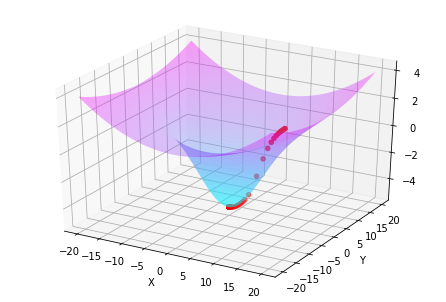

In [101]:
ite = 100 
x_0 = 8 ; y_0 = 8
hist_x = [] ; hist_y = [] ; hist_f = []

grad_x , grad_y = num_grad_f (x_0,y_0)
x = x_0 - 1*grad_x ; y = y_0 - 1*grad_y
grad_x , grad_y = num_grad_f (x,y)
init = np.array([x,y,x_0,y_0,grad_y,grad_x,f(x,y)],dtype = float).reshape((1,7))
print(init)
result = model2.predict(init)
#print(result.shape)
eta = result[0,0]
theta = result[0,1]
for i in range(ite):
    x_tmp = x - eta * grad_x + theta * (x - x_0)
    y_tmp = y - eta * grad_y + theta * (y - y_0)
    hist_x.append(x_tmp);hist_y.append(y_tmp) ; hist_f.append(f(x_tmp,y_tmp))
    x_0 = x ; y_0 = y
    x = x_tmp ; y = y_tmp
    grad_x , grad_y = num_grad_f (x,y)
    init = np.array([x,y,x_0,y_0,grad_y,grad_x,f(x,y)]).reshape((1,7))
    result = model2.predict(init)
    eta = result[0,0]; theta = result[0,1]
    
x = y = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(x, y)

Z = -5 * np.exp(-X * X / 80 - Y * Y / 20) + 0.007 * X * X + 0.003 * Y * Y

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('X')
plt.ylabel('Y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool',alpha = 0.4)
draw_step = 1
ax.scatter(hist_x[::draw_step],hist_y[::draw_step],hist_f[::draw_step],c = 'r', marker = 'o')
plt.show()

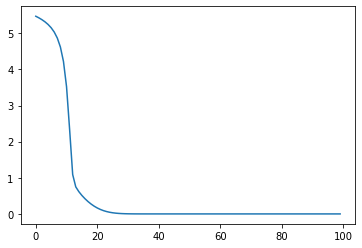

In [102]:
loss = hist_f  -  np.min(Z)
import matplotlib.pyplot as plt 
plt.plot(np.arange(len(loss)), loss)

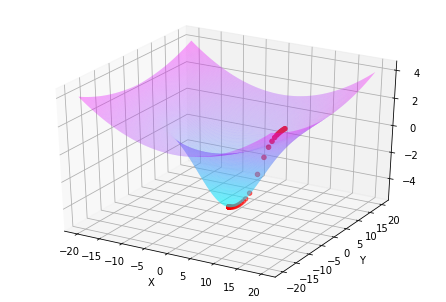

In [104]:
ite = 100 
x_0 = 8 ; y_0 = 8
hist_x = [] ; hist_y = [] ; hist_f = []

grad_x , grad_y = num_grad_f (x_0,y_0)
x = x_0 - grad_x ; y = y_0 - grad_y
grad_x , grad_y = num_grad_f (x,y)
init = np.array([x,y,x_0,y_0,grad_y,grad_x]).reshape((1,6))
result = model3.predict(init)
#print(result.shape)
eta = result[0,0]
theta = result[0,1]
for i in range(ite):
    x_tmp = x - eta * grad_x + theta * (x - x_0)
    y_tmp = y - eta * grad_y + theta * (y - y_0)
    hist_x.append(x_tmp);hist_y.append(y_tmp) ; hist_f.append(f(x_tmp,y_tmp))
    x_0 = x ; y_0 = y
    x = x_tmp ; y = y_tmp
    grad_x , grad_y = num_grad_f (x,y)
    init = np.array([x,y,x_0,y_0,grad_y,grad_x]).reshape((1,6))
    result = model3.predict(init)
    eta = result[0,0]; theta = result[0,1]
    
x = y = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(x, y)

Z = -5 * np.exp(-X * X / 80 - Y * Y / 20) + 0.007 * X * X + 0.003 * Y * Y

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('X')
plt.ylabel('Y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool',alpha = 0.4)
draw_step = 1
ax.scatter(hist_x[::draw_step],hist_y[::draw_step],hist_f[::draw_step],c = 'r', marker = 'o')
plt.show()

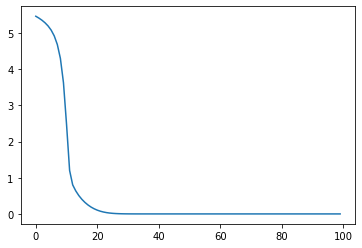

In [105]:
loss = hist_f  -  np.min(Z)
import matplotlib.pyplot as plt 
plt.plot(np.arange(len(loss)), loss)

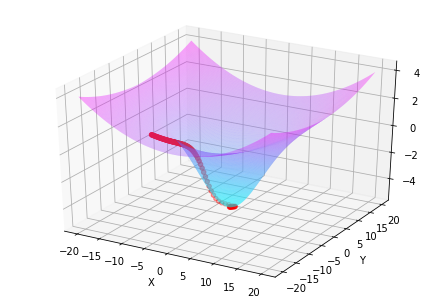

In [106]:
ite = 100 
x_0 = -10 ; y_0 = -12
hist_x = [] ; hist_y = [] ; hist_f = []

grad_x , grad_y = num_grad_f (x_0,y_0)
x = x_0 - grad_x ; y = y_0 - grad_y
grad_x , grad_y = num_grad_f (x,y)
init = np.array([x,y,x_0,y_0,grad_y,grad_x]).reshape((1,6))
result = model3.predict(init)
#print(result.shape)
eta = result[0,0]
theta = result[0,1]
for i in range(ite):
    x_tmp = x - eta * grad_x + theta * (x - x_0)
    y_tmp = y - eta * grad_y + theta * (y - y_0)
    hist_x.append(x_tmp);hist_y.append(y_tmp) ; hist_f.append(f(x_tmp,y_tmp))
    x_0 = x ; y_0 = y
    x = x_tmp ; y = y_tmp
    grad_x , grad_y = num_grad_f (x,y)
    init = np.array([x,y,x_0,y_0,grad_y,grad_x]).reshape((1,6))
    result = model3.predict(init)
    eta = result[0,0]; theta = result[0,1]
    
x = y = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(x, y)

Z = -5 * np.exp(-X * X / 80 - Y * Y / 20) + 0.007 * X * X + 0.003 * Y * Y

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('X')
plt.ylabel('Y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool',alpha = 0.4)
draw_step = 1
ax.scatter(hist_x[::draw_step],hist_y[::draw_step],hist_f[::draw_step],c = 'r', marker = 'o')
plt.show()

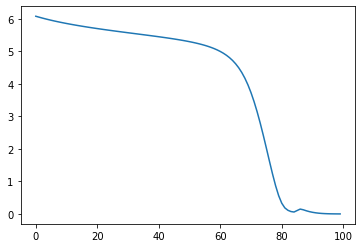

In [107]:
loss = hist_f  -  np.min(Z)
import matplotlib.pyplot as plt 
plt.plot(np.arange(len(loss)), loss)